# NetworkX

**INDICE**
1. Introduccion
2. Documentacion
3. Un nodo
4. Enlaces entre nodos
5. Eliminación de grafos
6. El grafo más simple
7. Grafos con pesos
8. Dirección de los enlaces
    - Grafos no dirigidos
    - Grafos dirigidos
9. Métricas de influencia y conectividad
    - Exploración del grafo
    - Grados
    - Centralidad
    - Influencia
    - Detección de comunidades
10. Dibujo de grafos
11. Otras acciones contra nodos
    - Ejemplo grid cuadrado
12. Camino de peso mínimo: algoritmo de Dijkstra

## Introducción

NetworkX es una librería de Python enfocada en la teoría de grafos. 

Esta herramienta nos posibilitará trabajar con grafos sin necesidad de definir nuestras propias estructuras.

Empecemos a jugar con lo más básico. Importamos la librería NetworkX para utilizar sus funciones y clases en el código y asignamos al alias *nx*.

In [5]:
# En caso de no tener instalada la librería ejecutar el siguiente código comentado (descomentar primero):
#!pip install networkx

import networkx as nx

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Podemos crear un grafo de diferentes maneras. NetworkX incluye diferentes funciones para generar grafos. Para empezar vamos a ver una serie de manipulaciones simples.

Pero antes, un pequeño recordatorio.

## Documentación

En el siguiente enlace podemos encontrar la documentación completa de la librería NetworkX. En todo momento se recomienda trabajar con la documentación a mano. 

https://networkx.org/documentation/stable/reference/introduction.html

Ahora sí, vayamos de lleno a la materia...

## Un nodo

La creación de nodos es muy sencilla, podemos añadir nodos uno a uno o una lista de nodos.

In [6]:
G = nx.Graph()
G.add_node(1)
G

Esta acción construye, como podemos observar, un objeto de la clase Graph de networkx.

Podemos añadir nodos en lote como listas.

In [7]:
G.add_nodes_from([2, 3])

La función `spring_layout` determina la posición de los nodos. En este caso particular, empleando el algoritmo de Fruchterman-Reingold.

El algoritmo utiliza un proceso iterativo para ajustar la colocación de los vértices con el fin de minimizar la "energía" del sistema. Al tratarse de un trazado iterativo, se ejecuta muchas veces, cambiando cada vez de forma incremental la posición de cada vértice en función de la posición anterior.

Documentación: 

1. NetworkX - https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html
2. Teoría - https://www.sciencedirect.com/topics/computer-science/reingold-layout

In [8]:
pos = nx.spring_layout(G)

nx.draw(G, cmap=plt.get_cmap('rainbow'), with_labels=True, pos=pos)

NetworkXError: random_state_index is incorrect

## Enlaces entre nodos

In [ ]:
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(1, 3)

pos = nx.spring_layout(G)
nx.draw(G, cmap=plt.get_cmap('rainbow'), with_labels=True, pos=pos)

## Eliminación de grafo y creación de uno nuevo

Podemos borrar el grafo y generar uno nuevo

In [ ]:
G.clear()

nx.draw(G, cmap = plt.get_cmap('rainbow'), with_labels=True)

## El grafo más simple

Este código utiliza NetworkX para crear un grafo y realizar algunas operaciones básicas en él.

In [ ]:
G = nx.Graph()
G.add_edges_from([(1,2),(2,3),(3,4),(4,1),(2,4)])

El grafo que hemos creado sigue la estructura del siguiente croquis.

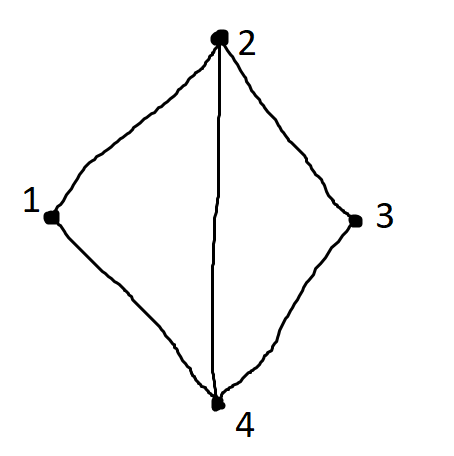

- `G = nx.Graph()`: Crea un objeto de tipo grafo no dirigido vacío llamado G utilizando la clase Graph de NetworkX.

- `G.add_edges_from([(1,2),(2,3),(3,4),(4,1),(2,4)])`: Agrega las aristas al grafo G. En este caso, se agregan las aristas (1,2), (2,3), (3,4), (4,1) y (2,4) al grafo mediante la función `add_edges_from()`. Estas aristas conectan los vértices 1, 2, 3 y 4 en una configuración específica.

Imprimamos por pantalla información básica del grafo que acabamos de crear.

In [ ]:
print("Los vértices de G son {}".format(list(G.nodes)))
print("Las aristas de G son {}".format(list(G.edges)))

print("Los vecinos de 1 en G son {}".format(list(G.neighbors(1))))
print("Los vecinos de 4 en G son {}".format(list(G.neighbors(4))))

Otro modo de crear grafos.

In [ ]:
G2 = nx.Graph()

G2.add_node(1)
G2.add_edge(1, 2)
G2.add_edges_from([(1, 2), (1, 3)])

G2.add_node("manuel")        # añade el nodo Manuel
G2.add_nodes_from("manuel")  # añade 4 nodos: m, a, n, u, e y l
G2.add_edge(3, 'K')          # añadimos conexión al nodo 3 con el nodo K

pos = nx.spring_layout(G2)
nx.draw(G2, cmap = plt.get_cmap('rainbow'), with_labels=True, pos = pos)

Más información de nuestro grafo.

In [ ]:
print("Número de nodos:", G2.number_of_nodes())
print("Número de enlaces:", G2.number_of_edges())

Nodos del grafo.

In [ ]:
list(G2.nodes)

Enlaces del grafo.

In [ ]:
list(G2.edges)

Obtención de los vecinos del nodo 1.

In [ ]:
list(G2.adj[1])

Acceso a información por elemento.

In [ ]:
G2[1]

## Grafos con pesos

En NetworkX, es posible asignar pesos a las aristas utilizando el método `add_weighted_edges_from`. Para ello, se proporcionan las primeras dos entradas de cada tripleta para representar los vértices y la tercera entrada para indicar el peso. Si deseamos obtener el peso de una arista, podemos considerar el grafo como una matriz y luego acceder al valor correspondiente utilizando la clave `weight` en un diccionario.

Si deseamos obtener información completa sobre las aristas, incluyendo sus datos, podemos utilizar el método `edges` y establecer el parámetro `data` como `True`. Esto nos permitirá acceder a todos los detalles de las aristas.

In [ ]:
W = nx.Graph()
W.add_weighted_edges_from([(1,2,1.1),(2,3,1.2),(3,4,1.4),(4,1,0),(2,4,1.6)])

print("Los vértices de W son {}".format(list(W.nodes)))
print("Las aristas de W son {}".format(list(W.edges)))
print("El peso de la arista (4,3) es {}".format(W[4][3]['weight']))
print("Las aristas de W y sus pesos son {}".format(list(W.edges(data=True))))

Observando la última lista, se aprecia que NetworkX utiliza un **diccionario** para almacenar el peso de las aristas. Este diccionario de datos de las aristas no solo puede contener información sobre el peso, sino también otros datos de carácter más general. De manera similar, los vértices también cuentan con su propio diccionario de datos, donde se puede guardar información extra.

## Dirección de los enlaces de un grafo

Los gráfos pueden ser de dos tipos:

- No dirigidos: formado por pares no ordenados.
- Dirigidos: formado por pares ordenados.

### Grafos no dirigidos

Vamos a trabajar con uno de los grafos que nos proporciona NetworkX.

Este grafo representa la red social de un club de karate, estudiada por Wayne W. Zachary durante un periodo de 3 años de 1970 a 1972. Esta red recoge las relaciones entre 34 miembros del club, documentando la relación entre pares de miembros que interactuaron fuera del club. Durante este estudio hubo un conflicto entre el administrados "John A" y el instructor "Mr. Hi" (ambos seudónimos), lo que llevó a separar el club en dos. La mitad pasaron a formar parte del club de Mr.Hi, la otra mitad buscaron otro instructor de karate. Basandonos en los datos recogidos por Zachary, este asignó correctamente a todos los miembros excepto a uno, a los nuevos dos clubes.

In [ ]:
G_karate = nx.karate_club_graph()

Definimos la posición de los nodos y luego dibujamos el grafo.

In [ ]:
pos = nx.spring_layout(G_karate)
nx.draw(G_karate, cmap=plt.get_cmap('rainbow'), with_labels=True, pos=pos)

In [ ]:
G_karate.nodes()

In [ ]:
G_karate.edges()

El grado de un vértice $v$ en un grafo no dirigido es igual al número de aristas incidentes en $v$.

Nuestro grafo tiene 34 nodos.

Podemos obtener el grado de cada nodo mediante el llamado a la siguiente función:

In [ ]:
G_karate.degree()

Esta información se puede tratar de forma más limpia si se convierte en una lista de tuplas.

In [ ]:
degree_sequence = list(G_karate.degree())
degree_sequence

###  Grafos dirigidos 

Si deseas trabajar con gráficos dirigidos en NetworkX, debes utilizar un tipo de objeto diferente llamado `DiGraph`. Al emplear este objeto, le indicas a NetworkX que el orden de los vértices en cada arista, lo cual representa visualmente las aristas como flechas en el gráfico. Al utilizar la función `neighbors` en un `DiGraph`, ahora obtendrás únicamente los vértices hacia los cuales hay una flecha desde el vértice dado. Si deseas conocer los vértices desde los cuales hay una flecha hacia un vértice específico, debes utilizar la función `predecessors`. 

Para comprender mejor este concepto, puedes comparar el siguiente código con el primer ejemplo que vimos anteriormente.

In [ ]:
D = nx.DiGraph()
D.add_edges_from([(1,2),(2,3),(3,4),(4,1),(2,4)])

print("En D hay flecha del nodo 1 a los nodos {}".format(list(D.neighbors(1))))
print("En D hay flecha del nodo 4 a los nodos {}".format(list(D.neighbors(4))))

print("En D hay flecha hacia el nodo 1 desde los nodos {}".format(list(D.predecessors(1))))
print("En D hay flecha hacia el nodo 4 desde los nodos {}".format(list(D.predecessors(4))))

## Métricas de influencia y conectividad

En este punto vamos a ver de forma pŕactica las métricas estudiadas para analizar la conectividad e influencia en una red.

Conjunto de datos: Students.
Podemos encontrar el conjunto de datos del notebook en el siguiente link http://vladowiki.fmf.uni-lj.si/doku.php?id=pajek:data:pajek:students

Usaremos un conjunto de grafos descritos así:

>Había 32 estudiantes (22 mujeres y 10 hombres) en la 4ª clase de Sociología, Ciencias Sociales Informáticas, Facultad de Ciencias Sociales, Liubliana. Los estudiantes se conocen muy bien. Se recogieron varias redes utilizando las siguientes preguntas

- as1.net: **Supón que cumples años la semana que viene y organizas una fiesta. ¿A quién te gustaría invitar a la fiesta? Elige tantos estudiantes como desees.**

Estos ficheros estan en formato `pajek`. Para esta demo se usa el primer fichero `as1.net`.

In [ ]:
students_graph = nx.read_pajek("as1.net")

### Exploración del grafo

Vamos a realizar un análisis exploratorio del dato, de sus nodos, el número de enlaces y una representación visual

In [ ]:
np.array(students_graph.nodes)

In [ ]:
len(np.array(students_graph.edges))

In [ ]:
pos = nx.layout.kamada_kawai_layout(students_graph)
fig, ax = plt.subplots(1, 1, figsize=(10,10))
nx.draw(students_graph,
        pos=pos,
        with_labels=True, 
        ax=ax)
plt.show()

### Grados

Se conoce como grado de un vértice $v$, en un grafo no dirigido, al número de aristas incidentes en $v$. Veamos los vértices de la red ordenados según su grado y la representación de este.

In [ ]:
d = students_graph.degree()
d = pd.Series(dict(d)).sort_values(ascending=False)
d.head()

Los nodos m41 y m15 son los que tienen mayor grado.

In [ ]:
plt.stem(d)

Al representar gráficamente los grados, vemos que hay 4 estudiantes claramente con mayor grado y 4 (los de la derecha del gráfico) con menor grado. Pero no sabemos aún si estos estudiantes de mayor grado son los más populares a los que la gente invita o sin embargo que invitarían a muchos estudiantes a su fiesta.

#### Grado IN

Sea v un vértice de un grafo dirigido G:

- Se denomina grado de entrada (indegree) de $v$, $de(v)$, al número de arcos cuyo extremo final es $v$.
- Se denomina grado de salida (outdegree) de $v$, $ds(v)$, al número de arcos cuyo extremo inicial es $v$.

Veamos ahora el número de aristas incidentes.

In [ ]:
d = students_graph.in_degree()
d = pd.Series(dict(d)).sort_values(ascending=False)
d.head()

In [ ]:
d = students_graph.in_degree()
d = pd.Series(dict(d)).sort_values(ascending=True)
d.head()

En este caso, los estudiantes con mayor grado de entrada serán los estudiantes más populares a los que la mayoría de alumnos quieren invitar a su fiesta. Vemos que hay claramente un estudiante muy popular, z16. El estudiante más impopular es m32, ya que ningún estudiante le invitaría a su fiesta.

In [ ]:
plt.stem(d)

En el gráfico se observa el estudiante más popular frente a 4 estudiantes muy poco populares, que solo serían invitados por dos personas a su fiesta de cumpleaños.

#### Grado OUT

Estudiemos las aristas de salida.

In [ ]:
d = students_graph.out_degree()
d = pd.Series(dict(d)).sort_values(ascending=False)
d.head()

En este caso los estudiantes que más gente invitarían a su fiesta son los que tenían mayor grado en el primer caso, m41 y m15. Por tanto al desglosar el grado en grado de entrada y de salida queda demostrado que no son estos los estudiantes más populares sino los que invitarían a más personas.

In [ ]:
plt.stem(d)

En el gráfico se puede ver que hay tres estudiantes que no invitarían a ningún compañero.

In [ ]:
d = students_graph.out_degree()
d = pd.Series(dict(d)).sort_values(ascending=True)
d.head()

### Centralidad

Otra métrica importante del análisis de redes es decidir qué vértices son más importantes que otros. La importancia de un vértice depende del tipo de grafo.

Una de las nociones más simples de centralidad es identificar el centro del grafo. Este está formado por aquellos vértices cuya excentricidad es igual al radio del grafo. Todos los vértices del centro del grafo tienen centralidad máxima.

#### Closeness Centrality

Calculo de la suma promedio de las distancias más cortas desde un nodo hacia todos los demás.

In [ ]:
nx.algorithms.centrality.closeness_centrality(students_graph,"m41")

In [ ]:
d = nx.algorithms.centrality.closeness_centrality(students_graph)
d = pd.Series(dict(d)).sort_values(ascending=False)
d.head(10)

In [ ]:
d = nx.algorithms.centrality.closeness_centrality(students_graph)
d = pd.Series(dict(d)).sort_values(ascending=True)
d.head(10)

Observamos que el alumno más popular es aquel que tiene un mayor valor de centralidad y el alumno más impopular el mínimo valor de centralidad.

In [ ]:
plt.stem(d)

### Betweenness Centrality

Medida que cuantifica la frecuencia o el número de veces que un nodo actúa como un puente a lo largo del camino más corto entre otros dos nodos. La idea intuitiva es que si se eligen dos nodos al azar, y luego también al azar uno de los eventuales posibles caminos más cortos entre ellos, entonces los nodos con mayor intermediación serán aquellos que aparezcan con mayor probabilidad dentro de este camino.

In [ ]:
students_graph_simple = students_graph.to_undirected()

In [ ]:
d = nx.algorithms.centrality.betweenness.betweenness_centrality(students_graph_simple)
d = pd.Series(dict(d)).sort_values(ascending=False)
d.head()

In [ ]:
d = nx.algorithms.centrality.betweenness.betweenness_centrality(students_graph_simple)
d = pd.Series(dict(d)).sort_values(ascending=True)
d.head()

En este caso no es el estudiante más popular el que tiene mayor valor de intermediación. El estudiante m15 es aquel que se relaciona con mayor cantidad diferente de estudiantes

In [ ]:
plt.stem(d)

### Eigenvector Centrality

Mide la influencia de un nodo en una red. Los nodos que poseen un valor alto de esta medida de centralidad están conectados a muchos nodos que a su vez están bien conectados, también en este sentido; por lo tanto, son buenos candidatos para difundir información.

In [ ]:
from statistics import mean

G = nx.Graph()
for u,v,data in students_graph.edges(data=True):
    if not G.has_edge(u,v):
        # set weight to 1 if no weight is given for edge in M
        weight = mean(d.get('weight',1) for d in students_graph.get_edge_data(u,v).values())
        G.add_edge(u, v, weight=weight)
        
students_graph_simple = G.copy()

In [ ]:
d = nx.eigenvector_centrality(students_graph_simple)
d = pd.Series(dict(d)).sort_values(ascending=False)
d.head()

In [ ]:
d = nx.eigenvector_centrality(students_graph_simple)
d = pd.Series(dict(d)).sort_values(ascending=True)
d.head()

Ene ste caso vemos que el estudiante más popular vuelve a ser un nodo importante. Pero también lo es z19, nodo que tenía un alto grado de centralidad. Aquel con menor influencia es z27, nodo con un bajo valor de intermediación (si se elimina de la red no se cortan caminos entre nodos) y de centralidad, por lo que tiene sentido que no sea un buen candidato para difundir información

In [ ]:
plt.stem(d)

### Influencia

#### Page Rank

PageRank de un nodo refleja la importancia del mismo en la red.

Se interpreta un enlace de un nodo A a otro B como un voto, (de A a B). Además se analiza la puntuación del nodo origen, los votos emitidos por nodos "importantes", es decir con un PageRank elevado, valen más, y ayudan a hacer a otros "importantes".

Se suele utilizar para la red Internet y con aristas direccionales, que hacen referencia a los hipervínculos.

In [ ]:
d = nx.algorithms.pagerank(students_graph_simple.to_directed())

In [ ]:
d = pd.Series(dict(d)).sort_values(ascending=False)
d.head()

In [ ]:
plt.stem(d)

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
pos = nx.spring_layout(students_graph_simple.to_directed(),seed = np.random.seed(42))

nx.draw(students_graph_simple.to_directed(),
        pos=pos,
        ax=ax,
        with_labels=True, 
        alpha=1,
        node_size=d*3E4)

### Detección de comunidades

Una red tiene estructura de comunidades si los nodos de pueden ser fácilmente agrupados en grupos que pueden estar superpuestos. Si se buscan comunidades no superpuestas, la red se divide de forma natural en grupos densamente conectados internamente y con pocas conexiones entre grupos.

Documentación: https://networkx.github.io/documentation/stable/reference/algorithms/community.html#module-networkx.algorithms.community

In [ ]:
plt.rcParams["figure.figsize"] = (7,7)

In [ ]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)

In [ ]:
nx.draw(G, pos=pos, with_labels=True)
plt.show()

In [ ]:
communities = nx.community.girvan_newman(G)

In [ ]:
community = next(communities)
community

In [ ]:
node_color = dict()

for node in community[0]:
    node_color[node] = 'r'

for node in community[1]:
    node_color[node] = 'b'

node_color = [node_color[node] for node in sorted(node_color)]

In [ ]:
nx.draw(G, pos=pos, node_color=node_color, with_labels=True)
plt.show()

In [ ]:
next(communities)
community = next(communities)
community

In [ ]:
node_color = dict()

for node in community[0]:
    node_color[node] = 'r'

for node in community[1]:
    node_color[node] = 'b'

for node in community[2]:
    node_color[node] = 'g'

for node in community[3]:
    node_color[node] = 'c'


node_color = [node_color[node] for node in sorted(node_color)]

In [ ]:
nx.draw(G, pos=pos, node_color=node_color, with_labels=True)
plt.show()

## Dibujo de grafos

NetworkX proporciona una funcionalidad básica para la visualización de grafos, pero hay que tener muy presente que el objetivo principal de la librería es permitir el análisis de gráficos en lugar de realizar la visualización de grafos.

Los dibujos de grafos de esta librería se construyen con diversas librerías abiertamente democratizadas para visualización de python, principalmente `matplotlib`.

Para el dibujo más simple empleamos la función `draw`. Cada vez que se ejecuta esta función, el dibujo resultante cambia de posición (el significado sigue siendo el mismo).

De nuestro grafo no dirigido:

In [ ]:
nx.draw(G)

De nuestro grafo dirigido:

In [ ]:
nx.draw(D)

## Otras acciones que podemos realizar contra nodos

Se pueden ejecutar las siguientes acciones contra los nodos de nuestros grafos:

1. Etiquetarlos por su nombre
2. Aplicarles una capa de color
3. Cambiarles el estilo de las aristas
4. Se puede pasar a un objeto `ax` de matplotlib sobre el que dibujar. Esta acción nos habilita la posibilidad de poder emplear las bodades de *matplotlib* para gestionar tamaños, posiciones, títulos, leyendas, etc.

Para etiquetar las aristas empleamos `draw_networkx_edge_labels`.

In [ ]:
# Generamos 3 figuras
fig, axes = plt.subplots(1,3)

# Gestionamos el tamaño de las figuras
fig.set_size_inches(9,3)

# Primer grafo
nx.draw(G, ax=axes[0], with_labels=True, node_color='blue', node_size=500)
axes[0].set_title("Gráfica G")

# Segundo grafo
layout = nx.spring_layout(W)
labels2 = nx.get_edge_attributes(W,'weight')
nx.draw(W, layout, ax=axes[1], with_labels=True, node_color='yellow', node_size=500)
nx.draw_networkx_edge_labels(W, layout, ax=axes[1], edge_labels=labels2)
axes[1].set_title("Gráfica ponderada W")

# Tercer grafo
nx.draw(D, ax=axes[2], with_labels=True, node_color='red', node_size=500)
axes[2].set_title("Gráfica dirigida D")

plt.show()

## Ejemplo con grid cuadrado

Se procede a definir un grafo dirigido en cuadrícula $n x n$. 

En primer lugar definimos una función que nos produce una estructura de grafos en cuadrícula $n x n$. Nos apoyamos en un bucle for para poder ejecutar esta acción de forma ordenada.

In [ ]:
def generacion_cuadricula(n_nodos_lateral):
    G = nx.DiGraph()
    for i in range(n_nodos_lateral):
        for j in range(n_nodos_lateral - 1):
            G.add_edge((i,j),(i,j+1))
            G.add_edge((j,i),(j+1,i))
    return(G)

En este caso empleamos la función `add_edge`. Podemos leer documentación de ella: https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.add_edge.html

Generemos un grid 5 x 5.

Si lo dibujamos con la función draw de *NetworkX* no refleja ningún orden aparente. Asimismo, como contrastamos anteriormente, si reejecutamos el dibujo del grafo, este cambia por completo. En algunos casos se puede intur la dimensión y en otros, será muy dificil, ya que nos enfrentamos a una amalgama de nodos y direcciones sin aparente orden visual.

In [ ]:
cuadricula = generacion_cuadricula(5)
nx.draw(cuadricula)

Para dotar de cierto orden al grafo, empleamos *matplotlib*.

In [ ]:
fig, ax = plt.subplots()

fig.set_size_inches(8,8)

cuadricula = generacion_cuadricula(5)
nx.draw(cuadricula, ax=ax, node_color='pink', pos={x:x for x in cuadricula.nodes})
nx.draw_networkx_labels(cuadricula, ax=ax, pos={x:(x[0]+0.2,x[1]+0.2) for x in cuadricula.nodes})
ax.set_title("Gráfica cuadrícula dirigida con parámetro 5")
plt.show()

## Caminos de peso mínimo: algoritmo de Dijkstra

Otro problema de teoría de gráficas que se vuelve mucho más versatil en las aplicaciones en su versión ponderada es el de encontrar caminos cortos entre dos vértices. 

En una gráfica sin pesos lo que nos interesa para conectar dos vértices óptimamente es simplemente que se minimice su número de aristas. En las gráficas con aristas ponderadas lo que nos interesará es encontrar un camino cuyo peso total sea mínimo.

Problema. Dada una gráfica ponderada $G$ y dos vértices $u$ y $v$, encontrar la distancia ponderada de $u$ a $v$.

Problema. Dada una gráfica ponderada $G$ y dos vértices $u$ y $v$, encontrar un camino de menor peso de $u$ a $v$.

Problema. Dada una gráfica ponderada $G$ y dos vértices $u$ y $v$, encontrar todas las distancias ponderadas entre cada par de vértices.


### Dijkstra

El algoritmo de Dijkstra, también llamado algoritmo de caminos mínimos, es un algoritmo para la **determinación del camino más corto, dado un vértice origen, hacia el resto de los vértices en un grafo que tiene pesos en cada arista**.

La idea subyacente en este algoritmo consiste en ir explorando todos los caminos más cortos que parten del vértice origen y que llevan a todos los demás vértices; cuando se obtiene el camino más corto desde el vértice origen hasta el resto de los vértices que componen el grafo, el algoritmo se detiene. 

Se trata de una especialización de la búsqueda de costo uniforme y, como tal, no funciona en grafos con aristas de coste negativo (al elegir siempre el nodo con distancia menor, pueden quedar excluidos de la búsqueda nodos que en próximas iteraciones bajarían el costo general del camino al pasar por una arista con costo negativo).

Pasos básicos:

1. Comenzamos estableciendo una distancia inicial infinita para todos los nodos, excepto para el nodo de inicio, al cual le asignamos una distancia de 0.

2. Luego, seleccionamos el nodo de menor distancia que no haya sido visitado aún. Comenzamos con el nodo de inicio en la primera iteración.

3. A partir del nodo seleccionado, examinamos todas sus aristas y actualizamos las distancias de los nodos adyacentes si encontramos un camino más corto. Esto significa que si la distancia actual del nodo seleccionado más el peso de la arista es menor que la distancia almacenada para el nodo adyacente, actualizamos la distancia.

4. Repetimos el paso 3 para todos los nodos no visitados, seleccionando siempre el nodo con la distancia más baja hasta el momento.

5. Continuamos repitiendo los pasos 3 y 4 hasta que hayamos visitado todos los nodos o hasta que no queden nodos alcanzables desde el nodo de inicio.

6. Al finalizar, tendremos la distancia más corta desde el nodo de inicio a todos los demás nodos en el grafo.

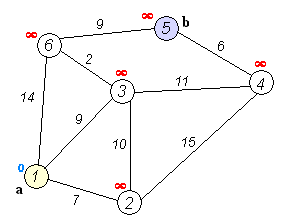

Empecemos a elaborar el algoritmo.

In [ ]:
def dijkstra(G, u, v):
    masinf = float('inf')
    vertices = list(G.nodes)
    distancias = {w:masinf for w in vertices}
    fijos = {w:False for w in vertices}
    padres = {w:None for w in vertices}
    distancias[u] = 0
    fijos[u] = True
    nuevo_fijo = u

    while not(all(fijos.values())):
        
        # Acualizar distancias.
        for w in G.neighbors(nuevo_fijo):
            if fijos[w] == False:
                nueva_dist = distancias[nuevo_fijo] + G[nuevo_fijo][w]['weight']
                if distancias[w] > nueva_dist:
                    distancias[w] = nueva_dist
                    padres[w] = nuevo_fijo

        # Encontrar el nuevo a fijar.
        mas_chica = masinf
        for w in vertices:
            if fijos[w] == False and distancias[w] < mas_chica:
                optimo = w
                mas_chica = distancias[w]
        nuevo_fijo = optimo
        fijos[nuevo_fijo] = True

        # Cuando fije el vértice final v, dar el camino.
        if nuevo_fijo == v:
            camino = [v]
            while camino[0] != u:
                camino = [padres[camino[0]]] + camino
            return distancias[v], camino

Generamos un grafo de sparring.

In [ ]:
G = nx.Graph()

G.add_weighted_edges_from([
    (1, 7, 85), (7, 16, 61), (12, 18, 68), (10, 11, 34),
    (14, 10, 65), (6, 5, 99), (15, 13, 64), (1, 11, 60),
    (18, 12, 85), (11, 12, 93), (1, 2, 79), (1, 4, 92),
    (17, 13, 89), (8, 6, 40), (15, 2, 99), (1, 3, 75),
    (15, 14, 69), (6, 17, 79), (9, 5, 59),
    (1, 12, 82), (7, 10, 89), (5, 3, 73), (15, 12, 80),
    (17, 1, 85), (5, 13, 87), (3, 4, 86), (4, 7, 90)
    ])

nx.draw(G)

Tal y como se visualiza el grafo, se aprecia desordenado y tedioso.

Para **mejorar la visualización**, empleamos el algoritmo de **Kamada-Kawai**. La función `kamada_kawai_layout` de NetworkX posiciona los nodos usando la función de coste de Kamada-Kaway.

En su artículo, Kamada y Kawai proponen que, en algunos casos, la reducción del número de cruces de enlaces que posee una grafo no es un buen criterio estético para implementar un algoritmo de diseño de redes. Mediante su aproximación y minimizar la tensión ($stress$) en la ecuación, el método de Kamada-Kawai *conserva el equilibrio total de un grafo, y produce diseños con pequeñas cantidades de los cruces de enlace*.

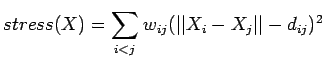

In [ ]:
KKL = nx.kamada_kawai_layout(G)
KKL

Ahora tenemos una ubicación fija para cada uno de los nodos que optimiza su visualización.

In [ ]:
labels = nx.get_edge_attributes(G,'weight')

fig, ax = plt.subplots(1)
fig.set_size_inches(10,10)
nx.draw_kamada_kawai(G, ax=ax, with_labels=True, node_color='pink', node_size=500)
nx.draw_networkx_edge_labels(G, KKL, ax=ax, edge_labels=labels)

D = dijkstra(G,7,17)
plt.show()
print("El camino más corto del vértice 7 al 17 es {} y pesa {}".format(D[1],D[0]))